In [ ]:
pip install wget

In [ ]:
import numpy as np 
import pandas as pd 
import os, sys, wget
from zipfile import ZipFile
import glob
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras import utils as np_utils
from sklearn.model_selection import train_test_split

In [ ]:
url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
tiny_imgdataset = wget.download('http://cs231n.stanford.edu/tiny-imagenet-200.zip', out = os.getcwd())
for file in os.listdir(os.getcwd()):
    if file.endswith(".zip"):
        zip = ZipFile(file)
        zip.extractall()
    else:
        print("not found")

not found
not found


In [ ]:
train_path = os.listdir("/content/tiny-imagenet-200/train")

In [ ]:
Y_train = np.zeros((80000, 1))
X_train = np.zeros((80000, 64, 64)) 
k=0
for i in train_path:
  
  #print(i)
  path = glob.glob('/content/tiny-imagenet-200/train/' + (i) + '/images/')
  #tr_path.append(glob.glob('/content/train/tiny-imagenet-200/train/' + (i) + '/images/'))
  j = 0
  while j<400:
    Y_train[(k*400)+j] = k
    X_train[(k*400)+j, :, :] = cv2.cvtColor(cv2.imread(path[0] + i + '_'+str(j)+'.JPEG'), cv2.COLOR_BGR2GRAY)

    j+=1
  k+=1
  print(k)



In [ ]:
np.shape(X_train)

(80000, 64, 64)

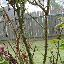

[10.]


In [ ]:
cv2_imshow(X_train[1500, :, :, :])
print(Y_train[1500, :])

In [ ]:
np.shape(X_train[1500, :, :, :])

(64, 64, 3)

In [ ]:
len(X_train)

30000

In [ ]:
np.min(X_train[1500, :, :, :])

0.0

In [ ]:
### Normalization
for i in range(len(X_train)):
  x = X_train[i, :, :]
  x = x/x.max()
  X_train[i, :, :] = x



In [ ]:

shuffle = list(range(np.size(Y_train, 0)))
np.random.shuffle(shuffle)
x_train = X_train[shuffle, :, :]
y_train = Y_train[shuffle, :]

In [ ]:
y_train = np_utils.to_categorical(y_train, 200)

In [ ]:
xx_train , xx_test, yy_train, yy_test = train_test_split(x_train, y_train, test_size=0.1, random_state=32)

In [ ]:
del X_train, Y_train

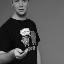

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
cv2_imshow(x_train[8000, :, :]*255)
print(y_train[8000, :])

In [ ]:
x_train = np.expand_dims(x_train, axis=-1 )

In [ ]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, ELU, core
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import BatchNormalization, Activation, Reshape
from keras import backend as K

from keras import layers
from keras import regularizers

from keras.callbacks import Callback
import numpy as np
import tensorflow as tf  
import matplotlib.pyplot as plt
import glob


num_classes = 200

#CNN
model = Sequential()

#layer1
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), input_shape=(64, 64, 1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3),strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

#layer2
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

#layer3
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

#layer4
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))


#output layer
model.add(Flatten())

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

#model.add(Dense(200))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 64, 64, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0

In [ ]:
epochs = 10
batch_size = 64
validation_split = 0.25


model.compile(loss=keras.losses.categorical_crossentropy,      #test 0.00005
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy'])


history = model.fit(xx_train, yy_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True,
          verbose=1,
          validation_split=validation_split,
          callbacks=[])


Epoch 1/10
844/844 [==============================] - 186s 210ms/step - loss: 5.7935 - accuracy: 0.0098 - val_loss: 5.0180 - val_accuracy: 0.0393
Epoch 2/10
844/844 [==============================] - 174s 206ms/step - loss: 5.3974 - accuracy: 0.0227 - val_loss: 4.7902 - val_accuracy: 0.0632
Epoch 3/10
844/844 [==============================] - 173s 205ms/step - loss: 5.1540 - accuracy: 0.0347 - val_loss: 4.6009 - val_accuracy: 0.0833
Epoch 4/10
844/844 [==============================] - 173s 205ms/step - loss: 4.9574 - accuracy: 0.0487 - val_loss: 4.4645 - val_accuracy: 0.0997
Epoch 5/10
844/844 [==============================] - 173s 206ms/step - loss: 4.8012 - accuracy: 0.0589 - val_loss: 4.3558 - val_accuracy: 0.1136
Epoch 6/10
844/844 [==============================] - 174s 206ms/step - loss: 4.6777 - accuracy: 0.0719 - val_loss: 4.2635 - val_accuracy: 0.1229
Epoch 7/10
844/844 [==============================] - 174s 206ms/step - loss: 4.5608 - accuracy: 0.0834 - val_loss: 4.2156 -

In [ ]:
model.predict(xx_test)
#(yy_test)

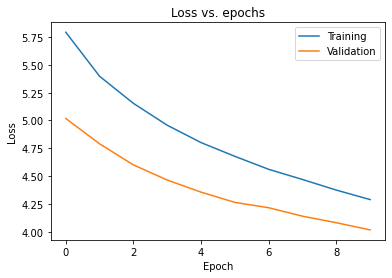

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.savefig("fig1.png" , dpi = 200)
plt.show()
#path = "/content/drive/MyDrive/fig/"

#path + 'Klassifikator1.svg', dpi=150

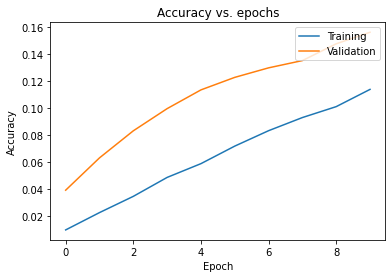

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.savefig("fig2.png" , dpi = 200)
plt.show()
#path = "/content/drive/MyDrive/fig/"

#path + 'Klassifikator1.svg', dpi=150